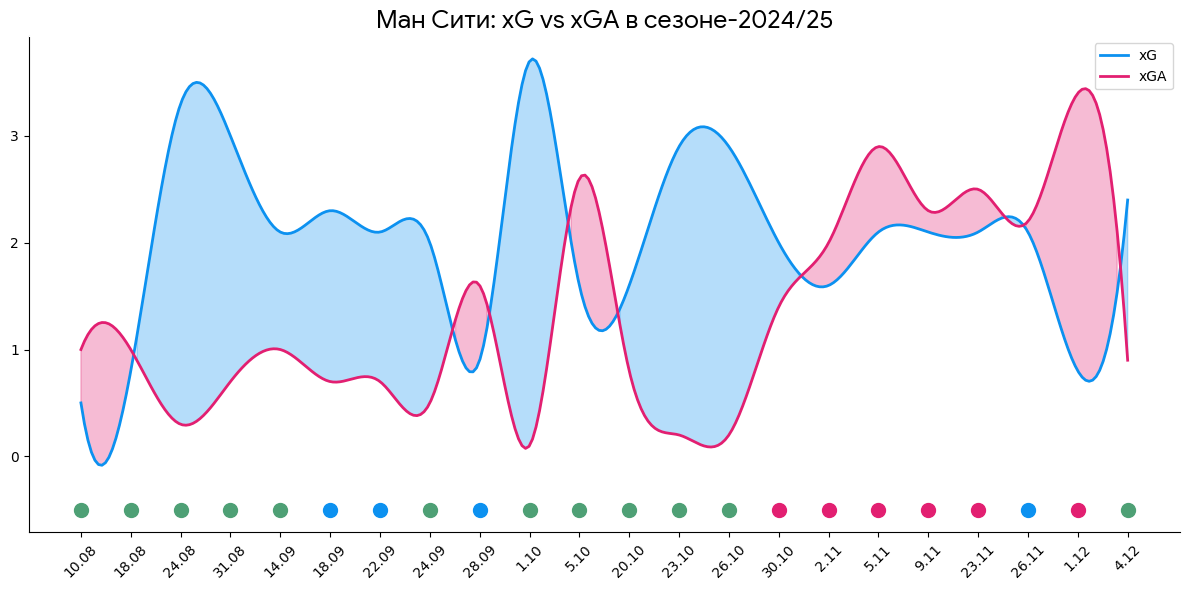

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import numpy as np
from scipy.interpolate import make_interp_spline

prop = fm.FontProperties(fname='//Users/zaytsev/GoogleSans-Regular.ttf')

data = {
    'Дата': ['10.08', '18.08', '24.08', '31.08', '14.09', '18.09', '22.09', '24.09', '28.09', '1.10', 
             '5.10', '20.10', '23.10', '26.10', '30.10', '2.11', '5.11', '9.11', '23.11', '26.11', 
             '1.12', '4.12'],
    'xG': [0.5, 0.8, 3.3, 3.0, 2.1, 2.3, 2.1, 2.0, 0.9, 3.7, 
           1.6, 1.6, 2.9, 2.9, 2.0, 1.6, 2.1, 2.1, 2.1, 2.1, 
           0.8, 2.4],
    'xGA': [1.0, 1.0, 0.3, 0.7, 1.0, 0.7, 0.7, 0.5, 1.6, 0.1, 
            2.6, 0.8, 0.2, 0.2, 1.4, 2.0, 2.9, 2.3, 2.5, 2.2, 
            3.4, 0.9],
    'Результат': ['W', 'W', 'W', 'W', 'W', 'D', 'D', 'W', 'D', 'W', 
                  'W', 'W', 'W', 'W', 'L', 'L', 'L', 'L', 'L', 'D', 
                  'L', 'W']
}

df = pd.DataFrame(data)

x = np.arange(len(df['Дата']))
x_smooth = np.linspace(x.min(), x.max(), 300)

spl_xG = make_interp_spline(x, df['xG'], k=3)
spl_xGA = make_interp_spline(x, df['xGA'], k=3)
xG_smooth = spl_xG(x_smooth)
xGA_smooth = spl_xGA(x_smooth)

plt.figure(figsize=(12, 6))

plt.plot(x_smooth, xG_smooth, color='#0c91f0', label='xG', linewidth=2)
plt.plot(x_smooth, xGA_smooth, color='#E21F71', label='xGA', linewidth=2)

plt.fill_between(x_smooth, xG_smooth, xGA_smooth, where=(xG_smooth > xGA_smooth), color='#0c91f0', alpha=0.3)
plt.fill_between(x_smooth, xG_smooth, xGA_smooth, where=(xGA_smooth > xG_smooth), color='#E21F71', alpha=0.3)

colors = {'W': '#4EA075', 'D': '#0c91f0', 'L': '#E21F71'}
for i, result in enumerate(df['Результат']):
    plt.scatter(df['Дата'][i], -0.5, color=colors[result], s=100)

plt.title('Ман Сити: xG vs xGA в сезоне-2024/25', fontproperties=prop, size=18)
plt.xlabel('', fontproperties=prop)
plt.ylabel('', fontproperties=prop)
plt.legend()
plt.grid(False)
plt.gca().set_facecolor('white')
plt.gca().spines['top'].set_color('white')
plt.gca().spines['right'].set_color('white')

plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("man city.png")